## Proyecto Redes Neuronales. Compración Perceptrón simple vs Perceptrón multicapa en  clasificación

Según los CDC, las enfermedades del corazón son una de las principales causas de muerte. Aproximadamente la mitad de los estadounidenses (47%) presentan al menos uno de los tres factores de riesgo clave de las enfermedades cardíacas: presión arterial alta, colesterol alto y tabaquismo. Otros indicadores clave son la condición de diabético, la obesidad (IMC elevado), la falta de actividad física o el consumo excesivo de alcohol. Detectar y prevenir los factores que más influyen en las enfermedades del corazón es muy importante en la asistencia sanitaria. Los avances informáticos, por su parte, permiten aplicar métodos de aprendizaje automático para detectar "patrones" a partir de los datos que puedan predecir el estado de un paciente.

En este proyecto vas a **comparar la eficacia de dos métodos diferentes en la predicción del riesgo de padecer una enfermedad cardiaca**. 

El conjunto de datos procede de los CDC y es una parte importante del Sistema de Vigilancia de los Factores de Riesgo en el Comportamiento, que realiza encuestas telefónicas anuales para recopilar datos sobre el estado de salud de los residentes en EE.UU. El dataset original tiene casi 300 variables, pero se ha reducido a sólo unas 20 variables. 

Tienes que realizar las siguientes tareas:
    - Crear una función perceptron simple que dado un ejemplo o conjunto de ejemplos devuelva la clase predicha (-1, 1).
    - Crear una función para calcular el coste 'bisagra' para medir el error en clasificación.
    - Crear una función que calcule el gradiente de la función de coste por cada variable del perceptrón.
    - Programar el algortimo del descenso con gradiente y obtener los parámetros del perceptrón que mejor se ajusten a los datos de entrenamiento.
    - Calcular la matriz de confusión en los ejemplos de test.
    - Utilizando la librería sklearn entrenar 2 arquitecturas diferentes de redes neuronales.
    - Comparar las matrices de confusión de las Redes Neuronales con al obtenida por el perceptrón.

En la siguiente celda se leen los datos y se generan los conjuntos de entrenamiento y de test.

In [134]:
import pandas as pd
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
import numpy as np
from typing import Tuple, Optional, List
import random

datos = pd.read_csv("heart_2020.csv")
datos = datos.drop(['Unnamed: 0'], axis=1)
datos = shuffle(datos)
datos.head()

,HeartDisease,Smoking,AlcoholDrinking,Stroke,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,Asthma,KidneyDisease,SkinCancer,BMI,PhysicalHealth,MentalHealth,SleepTime
33522,1,1,0,0,0,1,11,5,0,1,2,0,1,0,25.11,0.0,0.0,7.0
22090,0,1,0,0,0,1,5,3,0,1,2,0,0,0,23.56,0.0,0.0,7.0
8570,0,0,0,0,0,0,7,5,0,1,0,0,0,0,23.30,0.0,0.0,8.0
31865,0,1,1,0,0,1,9,5,0,1,2,0,0,0,37.59,0.0,0.0,8.0
57751,1,1,0,0,0,1,10,5,2,0,1,0,0,0,35.15,2.0,2.0,6.0


In [135]:
datos.describe()

,HeartDisease,Smoking,AlcoholDrinking,Stroke,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,Asthma,KidneyDisease,SkinCancer,BMI,PhysicalHealth,MentalHealth,SleepTime
count,60000.000000,60000.00000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000
mean,0.456217,0.49335,0.060150,0.087117,0.229700,0.523233,7.620233,4.611650,0.458683,0.719467,2.231617,0.149533,0.073217,0.127967,28.971355,5.141217,4.201083,7.118750
std,0.498083,0.49996,0.237767,0.282008,0.420643,0.499464,3.413152,1.024753,0.838951,0.449264,1.396139,0.356616,0.260494,0.334055,6.541266,9.761226,8.466793,1.571938
min,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.210000,0.000000,0.000000,1.000000
25%,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,5.000000,5.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,24.410000,0.000000,0.000000,6.000000
50%,0.000000,0.00000,0.000000,0.000000,0.000000,1.000000,8.000000,5.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,27.920000,0.000000,0.000000,7.000000
75%,1.000000,1.00000,0.000000,0.000000,0.000000,1.000000,10.000000,5.000000,0.000000,1.000000,4.000000,0.000000,0.000000,0.000000,32.280000,4.000000,3.000000,8.000000
max,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,12.000000,5.000000,3.000000,1.000000,4.000000,1.000000,1.000000,1.000000,93.970000,30.000000,30.000000,24.000000


In [136]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler
from numpy.linalg import inv
# Ten en cuenta que la variable y tiene valores (0 y 1)
y: np.ndarray = np.array(datos['HeartDisease'])
datos = datos.drop(['HeartDisease'], axis=1)
X: np.ndarray = StandardScaler().fit_transform(np.array(datos))
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.2, random_state= 2)
print(y_test)


[0 0 1 ... 1 0 0]


La librería sklearn tiene implementada una clase MLPClassifier que es un perceptrón multicapa con el algoritmo de backpropagation que podemos utilizar en la siguiente celda se crea un preceptrón con una capa oculta y dos neuronas para que se ajuste a la función XOR.
Para ayuda sobre la clase y sus parámetros visitar: https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html

In [137]:
# X = np.array([[2,2], [0,0], [2,0], [0,2]])
# y = np.array([1, 1, 0, 0])


In [138]:
# Función para crear el perceptrón multicapa
pmc = MLPClassifier(solver='lbfgs', alpha=1e-2, hidden_layer_sizes=(2,), activation='logistic', random_state=1)
# Al llamar a fit se realiza el entrenamiento
pmc.fit(X_train, y_train)

y_p: np.ndarray = pmc.predict(X_test)

#Valores predichos
print('y_p',y_p)
# Valores de los pesos de la red
print('w',pmc.coefs_)
# Valores de los pesos correspondiente a los bias (x_0)
print('w_0',pmc.intercepts_)

y_p [0 0 1 ... 1 1 1]
w [array([[-3.20118910e-04,  7.17136925e-02],
       [-6.51574936e-02, -2.75765442e-02],
       [-2.61957133e+00,  1.55344346e-01],
       [ 2.61865981e-01,  7.49554434e-02],
       [ 6.01324541e-02,  1.52584420e-01],
       [ 1.79335744e-01,  4.02289183e-01],
       [ 1.65123452e-01, -9.48585434e-02],
       [-2.39376705e-01,  8.41214392e-02],
       [ 9.27840777e-02, -1.33943684e-03],
       [-4.68831700e+00, -1.56119341e-01],
       [-2.32976212e-02,  5.00813384e-02],
       [-8.11601981e-02,  8.10268582e-02],
       [-1.82378324e-01,  2.66694741e-02],
       [-2.17050936e-01, -1.18041155e-02],
       [-1.31715171e+00,  8.71083165e-02],
       [-6.35834553e-02,  3.61698688e-02],
       [-3.28496371e-02, -2.03828333e-02]]), array([[-2.51011745],
       [13.79937941]])]
w_0 [array([-8.4509231,  1.1107617]), array([-10.29838286])]


c:\Users\yerso\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [139]:
conlaFuncion: np.ndarray = confusion_matrix(y_test, y_p, labels=[1,0]).ravel()

# [[5027 1510]
#  [1344 4119]]

| tn | fp | fn | tp |
[4186 1225 1548 5041]
[5411    0 6589    0]
[3953 1458 1424 5165]
PESOS ADALINE =  [ 2.55083024  0.25288452  0.02752557  0.23752018  0.00983454 -0.02907052
  0.1641354   0.00531853  0.28304671  0.00821699 -0.24740954  0.34079094
  0.40204352 -0.01961286 -0.06213849  0.02265898 -0.05431912 -0.02012011]
PESOS INI ADALINE=  [ 2.55083024  0.25288452  0.02752557  0.23752018  0.00983454 -0.02907052
  0.1641354   0.00531853  0.28304671  0.00821699 -0.24740954  0.34079094
  0.40204352 -0.01961286 -0.06213849  0.02265898 -0.05431912 -0.02012011]


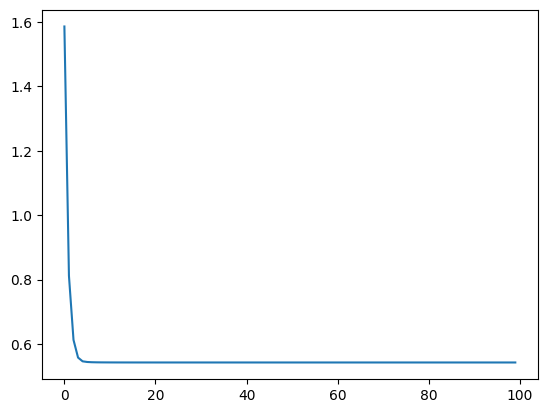

In [140]:
class AdalineClassifier:
    def __init__(self, alpha: float = 1e-2, random_state: int = 42, iters: int = 100) -> None:
        self.alpha: float = alpha
        self.random_state: int = random_state
        self.iters: int = iters
        self.X_train: Optional[np.ndarray] = None
        self.y_train: Optional[np.ndarray] = None
        self.Loss: Optional[np.ndarray] = None
        self.w_ini: Optional[np.ndarray] = None
        self.w: Optional[np.ndarray] = None

    def getWeigths(self) -> np.ndarray:
        return self.w
    
    def getWeigthsInit(self) -> np.ndarray:
        return self.w_ini
    
    def getLoss(self) -> np.ndarray:
        return self.Loss
    
    def init_weights(self) -> None:
        self.w_ini =  np.random.RandomState(self.random_state).uniform(low=-1, high=1, size=(18,))

    def perceptron(self, x: np.ndarray) -> int:
        return 1 if np.dot(self.w, x)> 0.5 else -1
    
    def coste(self) -> float:
        return np.sum([max(1-(np.dot(self.w, self.X_train[i])*self.y_train[i]), 0) for i in range(np.size(self.y_train))])/np.size(self.y_train)
    
    def gradientes(self) -> np.ndarray:
        diff_W: np.ndarray = np.zeros(self.X_train.shape[1])
        for x_i, y_i in zip(self.X_train, self.y_train): 
            if np.dot(self.w, x_i)*y_i < 1: diff_W -= x_i*y_i
        return diff_W/np.size(self.y_train)

    def DescensoGradiente(self) -> Tuple[np.ndarray, np.ndarray]:
        self.w: np.ndarray = self.w_ini
        self.Loss: np.ndarray = np.zeros(self.iters)
        for i in range(self.iters):
            self.Loss[i] = self.coste()
            self.w -= self.alpha * self.gradientes()
        return self.Loss, self.w
    
    def fitAdaline(self, X_train: np.ndarray, y_train: np.ndarray) -> None:
        self.init_weights()
        self.X_train = X_train
        self.y_train = y_train
        self.Loss, self.w = self.DescensoGradiente()

    def predictAdaline(self, X_test: np.ndarray) -> np.ndarray:
        return  [self.perceptron(X_test[i]) for i in range(len(X_test))]

def addBiasColumn(X: np.ndarray) -> np.ndarray:
    return np.c_[np.ones(len(X)), X ]

def convertNegativeToZeroExpresionMC(y: np.ndarray) -> np.ndarray:
    return np.where(np.isin(y, [-1]), 0, y)

X_train: np.ndarray = addBiasColumn(X_train)
X_test: np.ndarray  = addBiasColumn(X_test)
w_opt: np.ndarray = np.matmul(np.matmul(inv(np.matmul(X_train.T, X_train)),X_train.T), y_train)

network: AdalineClassifier = AdalineClassifier(alpha = 4)##1e-4
network.fitAdaline(X_train, y_train)

y_p: np.ndarray = network.predictAdaline(X_test)
y_pdg: np.ndarray = [ (1 if np.dot(w_opt, X_test[i])> 0.5 else -1) for i in range(len(X_test))]

y_p = convertNegativeToZeroExpresionMC(y_p)
y_pdg = convertNegativeToZeroExpresionMC(y_pdg)

mc_y: np.ndarray = confusion_matrix(y_test, y_p, labels=[1,0]).ravel()
mc_y_pdg: np.ndarray = confusion_matrix(y_test, y_pdg, labels=[1,0]).ravel()
print("| tn | fp | fn | tp |")
print(conlaFuncion)
print(mc_y)
print(mc_y_pdg)

print("PESOS ADALINE = ", network.getWeigths())
print("PESOS INI ADALINE= ", network.getWeigthsInit())
plt.plot(network.getLoss())
plt.show()
#-------------------------------------------------
# tn, fp, fn, tp <- [w, x, y, z]
# matriz de confusion del perceptron multicapa [4037, 1428, 1567, 4968]
# matriz de confusion del Adaline [5465    0 6523   12]
# matriz de confusion obteniendo los pesos por multiplicacion de matrices [3892 1573 1427 5108]
# pesos random usados por adaline
# PESOS =  [20.99808024  0.5270072  -0.0791013   2.73576682  4.81105152  1.46994978
#   3.41242629 -1.65356074  2.6820606  -1.92759262 -0.235847    0.0272522
#   0.67340398  2.235122    0.25877167  4.06403353  0.90794609 -0.13899405]
# PESOS INI =  [20.99808024  0.5270072  -0.0791013   2.73576682  4.81105152  1.46994978
#   3.41242629 -1.65356074  2.6820606  -1.92759262 -0.235847    0.0272522
#   0.67340398  2.235122    0.25877167  4.06403353  0.90794609 -0.13899405]
#-------------------------------------------------- 
# matriz de confusion del perceptron multicapa [4201, 1276, 1521, 5002]
# matriz de confusion del Adaline [5477    0 6523    0]
# matriz de confusion obteniendo los pesos por multiplicacion de matrices [3955 1522 1424 5099]
# pesos random usados por adaline
# PESOS =  [ 2.66808024  0.28479677  0.01700008  0.28138062  0.01098598 -0.0159212
#   0.18818795 -0.0179874   0.32250433  0.01098272 -0.23231329  0.36416046
#   0.43217375 -0.01084406 -0.04439568  0.01214201 -0.04953691 -0.02525613]
# PESOS INI =  [ 2.66808024  0.28479677  0.01700008  0.28138062  0.01098598 -0.0159212
#   0.18818795 -0.0179874   0.32250433  0.01098272 -0.23231329  0.36416046
#   0.43217375 -0.01084406 -0.04439568  0.01214201 -0.04953691 -0.02525613]

Ayudandonos de una biblioteca de Pandas para poder visualizar los datos de importancia.

In [141]:
import pandas as pd

def create_classification_table(TN: int, FP: int, FN: int, TP: int, row_names: List[str], column_names: List[str]) -> pd.DataFrame:
    accuracy: float = (TP + TN) / (TP + TN + FP + FN) if (TP + TN + FP + FN != 0) else 0.000001
    recall: float = TP / (TP + FN) if (TP+FN != 0) else 0.000001
    precision: float = TP / (TP + FP) if (TP + FP != 0) else 0.000001
    tnr: float = TN / (TN + FP) if (TN + FP != 0) else 0.000001
    
    data: List[List[float]] = [[TN, FP], [FN, TP]]
    index: List[str] = row_names
    columns: List[str] = column_names
    
    df: pd.DataFrame = pd.DataFrame(data, index=index, columns=columns)
    df['Accuracy'] = accuracy
    df['Recall'] = recall
    df['Precision'] = precision
    df['TNR'] = tnr
    
    return df


row_names: List[str] = ['Clase Negativa', 'Clase Positiva']
column_names: List[str] = ['Predicción Negativa', 'Predicción Positiva']

print("\nPARA EL PERCEPTRON MULTICAPA\n")
print(create_classification_table(conlaFuncion[0], conlaFuncion[1], conlaFuncion[2], conlaFuncion[3], row_names, column_names))  
print("\nPARA ADALINE\n")
print(create_classification_table(mc_y[0], mc_y[1], mc_y[2], mc_y[3], row_names, column_names))
print("\nUTILIZANDO UN PESO POR MULTIPLICACION DE MATRICES\n")
print(create_classification_table(mc_y_pdg[0], mc_y_pdg[1], mc_y_pdg[2], mc_y_pdg[3], row_names, column_names))


PARA EL PERCEPTRON MULTICAPA

                Predicción Negativa  Predicción Positiva  Accuracy    Recall  \
Clase Negativa                 4186                 1225  0.768917  0.765063   
Clase Positiva                 1548                 5041  0.768917  0.765063   

                Precision       TNR  
Clase Negativa     0.8045  0.773609  
Clase Positiva     0.8045  0.773609  

PARA ADALINE

                Predicción Negativa  Predicción Positiva  Accuracy  Recall  \
Clase Negativa                 5411                    0  0.450917     0.0   
Clase Positiva                 6589                    0  0.450917     0.0   

                Precision  TNR  
Clase Negativa   0.000001  1.0  
Clase Positiva   0.000001  1.0  

UTILIZANDO UN PESO POR MULTIPLICACION DE MATRICES

                Predicción Negativa  Predicción Positiva  Accuracy    Recall  \
Clase Negativa                 3953                 1458  0.759833  0.783882   
Clase Positiva                 1424                 5

En este problema de clasificación nos interesaría cuantas menor predicciones negativas falsas mejor, ya que esto significaría que a un paciente no se le ha diagnosticada nada cuando en realidad padece de la enfermedad. Por lo tanto sería bueno fijarse en el Recall, que mide la proporción de casos positivos que son correctamente identificados por el modelo, es decir, la capacidad del modelo para encontrar todos los casos positivos. Como resulta que el recal es tp/(tp+fn) si tenemos que el recall es muy grande significaría que hay muy pocos falsos negativos y si resulta lo contrario es que hay muchos falsos negativos, es decir, que funciona pero no tan bien para este problema. Por lo tanto el modelo que más recall tiene es el modelo 3 en el que obteniamos lo pesos con el método normal de Gauss.